# Assignment 1
### Assignment on line search

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math
from scipy.constants import golden

### 1. Write Python codes of two line search algorithms: Fibonacci search and Golden Section for the
### problem given in example 8.1.2 (same as in 8.1.3) in Nonlinear Programming, Bazaraa et al.
#### a. [10 marks] Generate and print the values given in Table 8.1 (for Golden section method) and Table 8.2 (for Fibonacci method) and check if you get the same results as in the book.

#### b. [5 marks] Check if the two search methods are asymptotically identical (run the code for 20 iterations and plot iteration number vs. interval length for the two methods)

#### c. [5 marks] Next use the scipy.optimize.minimize_scalar function and verify your results of Golden section method.


In [29]:
# Function in 8.1
def f(x):
    return x**2 + 2*x

In [30]:
start_left = -3
start_right = 5
n = 8

### Implementing Fibonacci Search

In [31]:
def fibonacci_search(func, left, right, n_iterations, epsilon = 0.01):
    
    a = []
    b = []
    l = []
    m = []
    fl = []
    fm = []
    o_index = []
    
    s = (1-math.sqrt(5))/(1+math.sqrt(5))
    p = 1/(golden*(1-s**(n_iterations+1))/(1-s**n_iterations))
    
    d = p*right + (1-p)*left
    fd = func(d)
    
    for i in range(0, n_iterations-1):
        
        if(i==n_iterations-1):
            c = epsilon*left + (1-epsilon)*d
        else:
            c = p*left + (1-p)*right
            
        fc = func(c)    
            
        a.append(left)
        b.append(right)
        l.append(c)
        m.append(d)
        fl.append(fc)
        fm.append(fd)
        o_index.append(i+1)   
        
        if(fc<fd):
            right, d, fd = d, c, fc
        else:
            left, right = right, c
            
        p = 1/(golden*(1-s**(n_iterations-i+1))/(1-s**(n_iterations-i)))   
        
    comp_table_pd = pd.DataFrame(list(zip(a, b, l, m, fl, fm)), index = o_index, columns = ['a', 'b', 'l', 'm', 'f_l', 'f_m'])
    
    if(left< right):
        return (left, right, comp_table_pd)
    else:
        return (right, left, comp_table_pd)

In [32]:
n = 20
interval_left_fs, interval_right_fs, comp_tab_fs = fibonacci_search(f, start_left, start_right, n)

In [33]:
optima_fs = (interval_left_fs + interval_right_fs)/2
print(optima_fs)

-0.9998870723231915


In [54]:
comp_tab_fs

,a,b,l,m,f_l,f_m
1,-3.000000,5.000000,0.055728,1.944272,0.114562,7.668737
2,-3.000000,1.944272,-1.111456,0.055728,-0.987578,0.114562
3,-3.000000,0.055728,-1.832816,-1.111456,-0.306418,-0.987578
4,0.055728,-1.832816,-0.665631,-1.111456,-0.888198,-0.987578
5,-1.832816,-0.665631,-1.386991,-1.111456,-0.850238,-0.987578
6,-0.665631,-1.386991,-0.941166,-1.111456,-0.996539,-0.987578
7,-0.665631,-1.111456,-0.835921,-0.941166,-0.973078,-0.996539
8,-1.111456,-0.835921,-1.006211,-0.941166,-0.999961,-0.996539
9,-1.111456,-0.941166,-1.046412,-1.006211,-0.997846,-0.999961
10,-0.941166,-1.046412,-0.981367,-1.006211,-0.999653,-0.999961


In [61]:
comp_tab_fs.to_csv('Fibo_Table.csv')

In [37]:
inter_len_fs = np.abs(comp_tab_fs['a']-comp_tab_fs['b'])
inter_len_fs

1     8.000000
2     4.944272
3     3.055728
4     1.888544
5     1.167184
6     0.721360
7     0.445825
8     0.275535
9     0.170290
10    0.105245
11    0.065044
12    0.040201
13    0.024843
14    0.015358
15    0.009486
16    0.005872
17    0.003614
18    0.002258
19    0.001355
dtype: float64

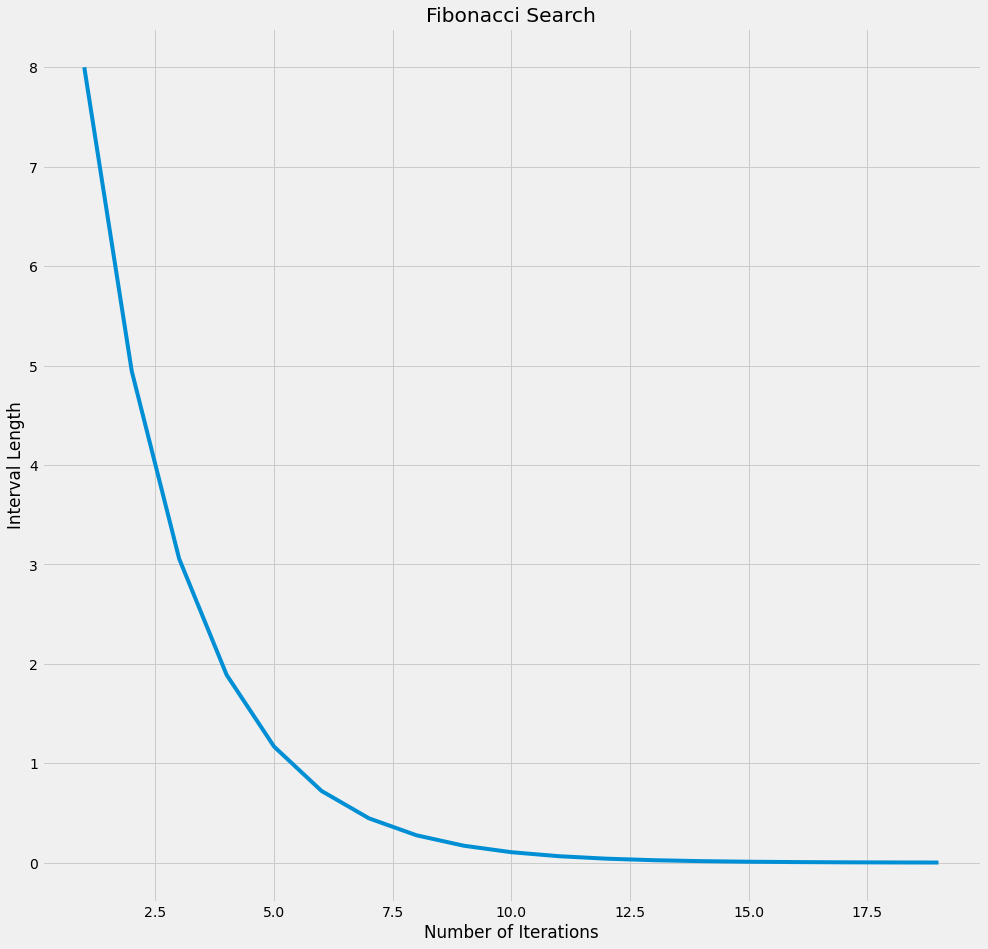

In [58]:
plt.figure(figsize=(15,15))
plt.plot(inter_len_fs)
plt.xlabel("Number of Iterations")
plt.ylabel("Interval Length")
plt.title('Fibonacci Search')
plt.show()

### Implementing Golden Search

In [10]:
def golden_search(func, left, right, n_iterations): 
    
    a = []
    b = []
    l = []
    m = []
    fl = []
    fm = []
    o_index = []
    
    p = golden-1
    d = p * right + (1 - p)*left
    fd = func(d)
    
    for i in range(0, n_iterations-1):
        
        c = p*left + (1-p)*right
        fc = func(c)
        
        a.append(left)
        b.append(right)
        l.append(c)
        m.append(d)
        fl.append(fc)
        fm.append(fd)
        o_index.append(i+1)
        
        if(fc<fd):
            right, d, fd = d, c, fc
        else:
            left, right = right, c
    
    comp_table_pd = pd.DataFrame(list(zip(a, b, l, m, fl, fm)), index = o_index, columns = ['a', 'b', 'l', 'm', 'f_l', 'f_m'])
    
    if(left< right):
        return (left, right, comp_table_pd)
    else:
        return (right, left, comp_table_pd)

In [40]:
n = 20
interval_left_gs, interval_right_gs, comp_tab_gs = golden_search(f, start_left, start_right, n)

In [41]:
optima_gs = (interval_left_gs + interval_right_gs)/2
print(optima_gs)

-0.9999182873019831


In [42]:
comp_tab_gs

,a,b,l,m,f_l,f_m
1,-3.000000,5.000000,0.055728,1.944272,0.114562,7.668737
2,-3.000000,1.944272,-1.111456,0.055728,-0.987578,0.114562
3,-3.000000,0.055728,-1.832816,-1.111456,-0.306418,-0.987578
4,0.055728,-1.832816,-0.665631,-1.111456,-0.888198,-0.987578
5,-1.832816,-0.665631,-1.386991,-1.111456,-0.850238,-0.987578
6,-0.665631,-1.386991,-0.941166,-1.111456,-0.996539,-0.987578
7,-0.665631,-1.111456,-0.835921,-0.941166,-0.973078,-0.996539
8,-1.111456,-0.835921,-1.006211,-0.941166,-0.999961,-0.996539
9,-1.111456,-0.941166,-1.046411,-1.006211,-0.997846,-0.999961
10,-0.941166,-1.046411,-0.981366,-1.006211,-0.999653,-0.999961


In [62]:
comp_tab_gs.to_csv('Golden_Section_Table.csv')

In [43]:
inter_len_gs = np.abs(comp_tab_fs['a']-comp_tab_fs['b'])
inter_len_gs

1     8.000000
2     4.944272
3     3.055728
4     1.888544
5     1.167184
6     0.721360
7     0.445825
8     0.275535
9     0.170290
10    0.105245
11    0.065044
12    0.040201
13    0.024843
14    0.015358
15    0.009486
16    0.005872
17    0.003614
18    0.002258
19    0.001355
dtype: float64

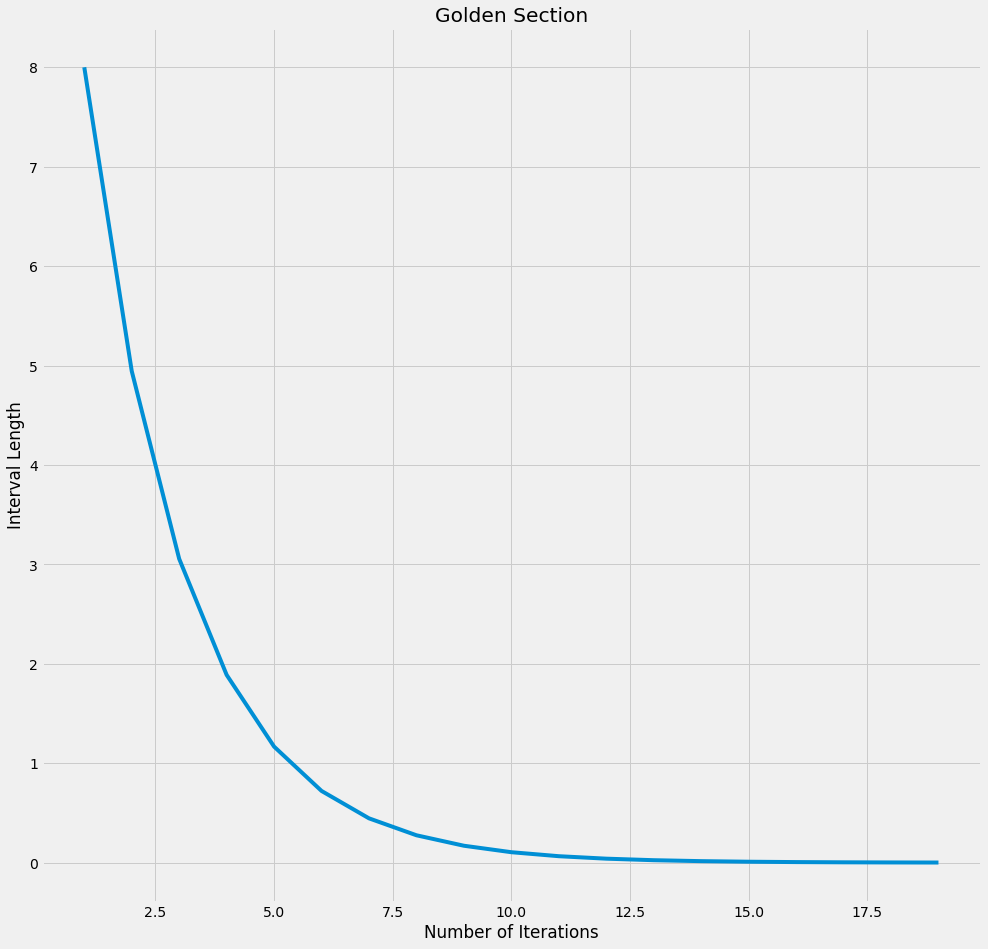

In [57]:
plt.figure(figsize=(15,15))
plt.plot(inter_len_gs)
plt.xlabel("Number of Iterations")
plt.ylabel("Interval Length")
plt.title('Golden Section')
plt.show()

### Verification of Golden Section Method

In [16]:
from scipy.optimize import minimize_scalar

In [17]:
opt_gs_ms = minimize_scalar(fun = f, bracket = (start_left, start_right), method = "golden")
opt_gs_ms.x

-0.9999999987444217

# Assignment 2

In [45]:
from scipy.optimize import line_search

In [46]:
def f1(x):
    return x[0]**2 + x[0]*x[1] + x[1]**2

def g1(x):
    a = 2*x[0] + x[1]
    b = 2*x[1] + x[0]
    return np.array([a,b])

In [47]:
x_initial = np.array([1,2])
dir_initial = np.array([-1,-1])
cond_1 = 0.0001
cond_2 = 0.9
max_step = 10
max_iter = 10
reduc_fact = 0.5

In [48]:
opt_ls = line_search(f = f1, myfprime = g1, xk = x_initial, pk = dir_initial, c1 = cond_1, c2 = cond_2, amax = max_step,
                     maxiter = max_iter)

In [49]:
alpha = opt_ls[0]
opt = x_initial + alpha*dir_initial

In [50]:
print("The x co-ordinate of the optima is: ", opt[0])
print("The y co-ordinate of the optima is: ", opt[1])

The x co-ordinate of the optima is:  0.0
The y co-ordinate of the optima is:  1.0


In [51]:
opt_ls

(1.0, 2, 1, 1.0, 7.0, array([1., 2.]))